<a href="https://colab.research.google.com/github/revanthpalla/BasicCodingHacks/blob/master/CycleSheet-02/HyperParameters_with_5X5_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

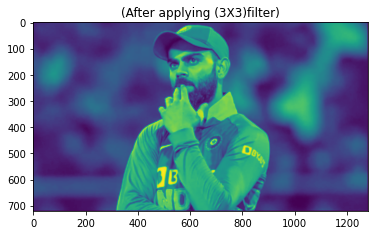

In [15]:
from matplotlib import image
from matplotlib import pyplot as plt
import cv2


# load image as pixel array
image = image.imread('virat.png',0)

import numpy as np

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

## converting into gray scale image    
image_gray = rgb2gray(image)
## obtain rows and columns of an image
m,n = image_gray.shape

# Developing filter(5, 5) mask 
mask = np.ones((5,5),np.float32)/25

# Convolve the 5X5 mask over the image  
img_new = np.zeros([m, n]) 

for i in range(2, m-2): 
    for j in range(2, n-2): 
        temp = image_gray[i-2, j-2]*mask[0, 0]+image_gray[i-1, j-2]*mask[0, 1]+image_gray[i, j - 2]*mask[0, 2]+image_gray[i+1, j-2]*mask[0, 3]+ image_gray[i+2, j-2]*mask[0, 4]+image_gray[i-2, j-1]*mask[1, 0]+image_gray[i-1, j-1]*mask[1, 1]+image_gray[i, j - 1]*mask[1, 2]+image_gray[i+1, j-1]*mask[1, 3]+ image_gray[i+2, j-1]*mask[1, 4]+image_gray[i-2, j]*mask[2, 0]+image_gray[i-1, j]*mask[2, 1]+image_gray[i, j]*mask[2, 2]+image_gray[i+1, j]*mask[2, 3]+ image_gray[i+2, j]*mask[2, 4]+image_gray[i-2, j+1]*mask[3, 0]+image_gray[i-1, j+1]*mask[3, 1]+image_gray[i, j+1]*mask[3, 2]+image_gray[i+1, j+1]*mask[3, 3]+ image_gray[i+2, j+1]*mask[3, 4]+image_gray[i-2, j+2]*mask[4, 0]+image_gray[i-1, j+2]*mask[4, 1]+image_gray[i, j+2]*mask[4, 2]+image_gray[i+1, j+2]*mask[4, 3]+ image_gray[i+2, j+2]*mask[4, 4]
        img_new[i, j]= temp

img_new = img_new.astype(np.uint8)
plt.imshow(img_new)
plt.title('(After applying (3X3)filter)')
plt.show()

In [16]:
## entropy of image
import skimage.measure 
entropy_FilImg = skimage.measure.shannon_entropy(img_new)
print('Entropy of (3X3)Filtered Image: {}'.format(entropy_FilImg))

Entropy of (3X3)Filtered Image: 7.402874327614349


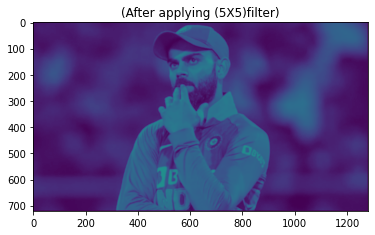

In [17]:
## with stride 2

img_new1 = np.zeros([m, n])

for i in range(2, m-2, 2): 
    for j in range(2, n-2): 
        temp = image_gray[i-2, j-2]*mask[0, 0]+image_gray[i-1, j-2]*mask[0, 1]+image_gray[i, j - 2]*mask[0, 2]+image_gray[i+1, j-2]*mask[0, 3]+ image_gray[i+2, j-2]*mask[0, 4]+image_gray[i-2, j-1]*mask[1, 0]+image_gray[i-1, j-1]*mask[1, 1]+image_gray[i, j - 1]*mask[1, 2]+image_gray[i+1, j-1]*mask[1, 3]+ image_gray[i+2, j-1]*mask[1, 4]+image_gray[i-2, j]*mask[2, 0]+image_gray[i-1, j]*mask[2, 1]+image_gray[i, j]*mask[2, 2]+image_gray[i+1, j]*mask[2, 3]+ image_gray[i+2, j]*mask[2, 4]+image_gray[i-2, j+1]*mask[3, 0]+image_gray[i-1, j+1]*mask[3, 1]+image_gray[i, j+1]*mask[3, 2]+image_gray[i+1, j+1]*mask[3, 3]+ image_gray[i+2, j+1]*mask[3, 4]+image_gray[i-2, j+2]*mask[4, 0]+image_gray[i-1, j+2]*mask[4, 1]+image_gray[i, j+2]*mask[4, 2]+image_gray[i+1, j+2]*mask[4, 3]+ image_gray[i+2, j+2]*mask[4, 4]
        img_new1[i, j]= temp

img_new1 = img_new1.astype(np.uint8)
plt.imshow(img_new1)
plt.title('(After applying (5X5)filter)')
plt.show()

In [18]:
## entropy of image
import skimage.measure 
entropy_FilImg = skimage.measure.shannon_entropy(img_new1)
print('Entropy of (5X5)Filtered Image with stride 2: {}'.format(entropy_FilImg))

Entropy of (5X5)Filtered Image with stride 2: 4.662337668016259


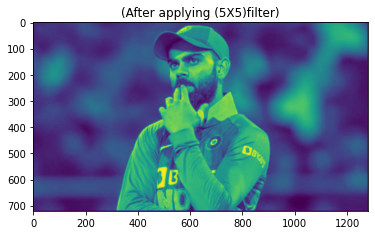

In [19]:
## with stride 1 and zero padding

image_gray = np.pad(image_gray, 1, mode='constant')
img_new2 = np.zeros([m, n])

for i in range(2, m-2): 
    for j in range(2, n-2): 
        temp = image_gray[i-2, j-2]*mask[0, 0]+image_gray[i-1, j-2]*mask[0, 1]+image_gray[i, j - 2]*mask[0, 2]+image_gray[i+1, j-2]*mask[0, 3]+ image_gray[i+2, j-2]*mask[0, 4]+image_gray[i-2, j-1]*mask[1, 0]+image_gray[i-1, j-1]*mask[1, 1]+image_gray[i, j - 1]*mask[1, 2]+image_gray[i+1, j-1]*mask[1, 3]+ image_gray[i+2, j-1]*mask[1, 4]+image_gray[i-2, j]*mask[2, 0]+image_gray[i-1, j]*mask[2, 1]+image_gray[i, j]*mask[2, 2]+image_gray[i+1, j]*mask[2, 3]+ image_gray[i+2, j]*mask[2, 4]+image_gray[i-2, j+1]*mask[3, 0]+image_gray[i-1, j+1]*mask[3, 1]+image_gray[i, j+1]*mask[3, 2]+image_gray[i+1, j+1]*mask[3, 3]+ image_gray[i+2, j+1]*mask[3, 4]+image_gray[i-2, j+2]*mask[4, 0]+image_gray[i-1, j+2]*mask[4, 1]+image_gray[i, j+2]*mask[4, 2]+image_gray[i+1, j+2]*mask[4, 3]+ image_gray[i+2, j+2]*mask[4, 4]
        img_new2[i, j]= temp

img_new2 = img_new2.astype(np.uint8)
plt.imshow(img_new2)
plt.title('(After applying (5X5)filter)')
plt.show()

In [20]:
## entropy of image
import skimage.measure 
entropy_FilImg = skimage.measure.shannon_entropy(img_new2)
print('Entropy of (5X5)Filtered Image with stride 1 and zero padding: {}'.format(entropy_FilImg))

Entropy of (5X5)Filtered Image with stride 1 and zero padding: 7.401520314341447
